In [ ]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_des = "/content/drive/MyDrive/data.csv"

In [ ]:
df = pd.read_csv(path_des)
df.head()

,comment,type
0,يعطيكم الصحة,normal
1,عشي عندهما رجال,normal
2,نبيك مغتصب الاطفال المنيوك,aggressive
3,بشير فار حبس خارج ثالثة ابتيدائي جاي اتناقش ما...,normal
4,مول القناة دزيزي جنيت تفرجت الفديو تاعك ولدي ت...,normal


In [ ]:
df['aggressive'] = df['type'].apply(lambda x: 1 if x =='aggressive' else  0)
df.head()

,comment,type,aggressive
0,يعطيكم الصحة,normal,0
1,عشي عندهما رجال,normal,0
2,نبيك مغتصب الاطفال المنيوك,aggressive,1
3,بشير فار حبس خارج ثالثة ابتيدائي جاي اتناقش ما...,normal,0
4,مول القناة دزيزي جنيت تفرجت الفديو تاعك ولدي ت...,normal,0


In [ ]:
#check the distribution of labels
df['type'].value_counts()


normal        2203
aggressive    2203
Name: type, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.comment,df.aggressive,test_size=0.2)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (3524,)
Shape of X_test:  (882,)


In [ ]:
X_train.head()

120     هههههه شعب بهيم الافارقة تجيب الغرب بحجة هجرة ...
2339    يرحم والدين والديك بشير بردتلنا قلوبنا ههههههه...
1192                                            تعرس غنية
3881    شيطانه مكروهه اغلب التوانسه وحده رخيه تسحايب ا...
2990                       تحيا الجزائر مريم تبانلي بيونة
Name: comment, dtype: object

In [ ]:
y_train.value_counts()

1    1770
0    1754
Name: aggressive, dtype: int64

In [ ]:
y_test.value_counts()

0    449
1    433
Name: aggressive, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('nb', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       449
           1       0.79      0.90      0.84       433

    accuracy                           0.83       882
   macro avg       0.84      0.83      0.83       882
weighted avg       0.84      0.83      0.83       882



In [ ]:
X_test[:5]

2921    جهل بالشرع خسارتك تونس خسارة جامع الزيتونة قبل...
3831    حياء دين امشي توب لربك صلي استري روحك عريانة ا...
1098                                  يوجد اليهود الجزاير
3285           سي جواجم جبري اعطيهم لواحد زوالي يتيم يقرا
2955                                 يعطيها الصحة المقدمة
Name: comment, dtype: object

In [ ]:
y_test[:5]

2921    0
3831    1
1098    0
3285    1
2955    0
Name: aggressive, dtype: int64

In [ ]:
y_pred[:5]

array([0, 1, 1, 1, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       449
           1       0.90      0.80      0.84       433

    accuracy                           0.86       882
   macro avg       0.86      0.85      0.86       882
weighted avg       0.86      0.86      0.86       882



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       449
           1       0.75      0.76      0.75       433

    accuracy                           0.76       882
   macro avg       0.76      0.76      0.76       882
weighted avg       0.76      0.76      0.76       882



In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def preprocess(text):

  # Tokenize the text into words
    words = word_tokenize(text)


   # Load Arabic stopwords from NLTK's corpus
    arabic_stopwords = set(stopwords.words('arabic'))

   # Remove stop words
    filtered_words = [word for word in words if word.casefold() not in arabic_stopwords]


    return " ".join(filtered_words)

In [ ]:
df['preprocessed_txt'] = df['comment'].apply(preprocess)

In [ ]:
df.head()

,comment,type,aggressive,preprocessed_txt
0,يعطيكم الصحة,normal,0,يعطيكم الصحة
1,عشي عندهما رجال,normal,0,عشي عندهما رجال
2,نبيك مغتصب الاطفال المنيوك,aggressive,1,نبيك مغتصب الاطفال المنيوك
3,بشير فار حبس خارج ثالثة ابتيدائي جاي اتناقش ما...,normal,0,بشير فار حبس خارج ثالثة ابتيدائي جاي اتناقش ما...
4,مول القناة دزيزي جنيت تفرجت الفديو تاعك ولدي ت...,normal,0,مول القناة دزيزي جنيت تفرجت الفديو تاعك ولدي ت...


In [ ]:
df.comment[1600]

'بشري بلحاج قصدرية تحب تحشيه بسيف القحبة دخلتها حقوق انسان واربعة مية تجرء وحرف القران تربحك'

In [ ]:
df.preprocessed_txt[1987]

'شاذ ومهرج يتناقشون مستقبل تونس'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.aggressive,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
   stratify=df.type
)

In [ ]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       441
           1       0.91      0.79      0.84       441

    accuracy                           0.85       882
   macro avg       0.86      0.85      0.85       882
weighted avg       0.86      0.85      0.85       882



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[407,  34],
       [ 94, 347]])

Text(95.72222222222221, 0.5, 'Truth')

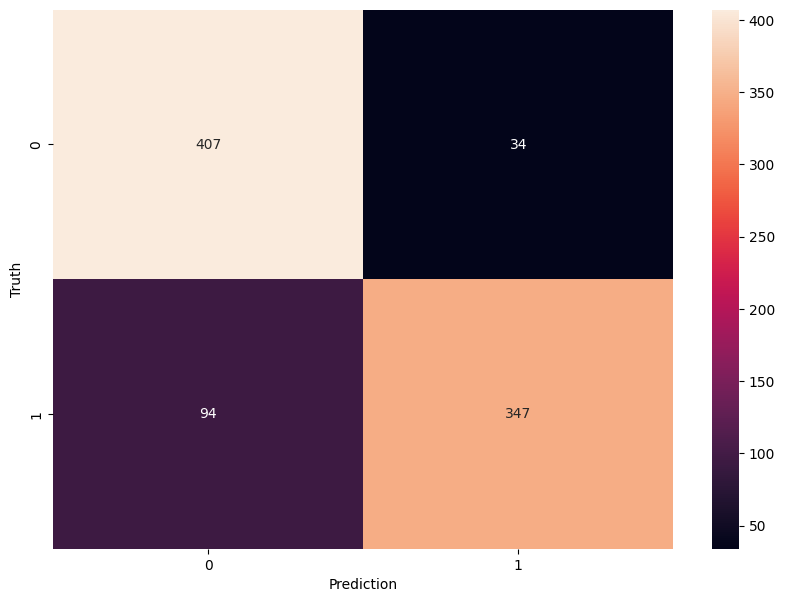

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
from sklearn import svm

svm = svm.SVC(kernel = 'linear', probability = True)

prob = svm.fit(y_train, y_test).predict_proba(X_test)

y_pred_svm = svm.predict(X_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy score for SVC is :", accuracy_score(y_test, y_pred_svm) * 100 ,"%")